## Hindmarsh-Rose Neuron Model

### System of differential equations

$$\frac{dx}{dt} = y - ax^{3} + bx^{2} - z + i$$

$$\frac{dy}{dt} = c - dx^{2} - y$$

$$\frac{dz}{dt} = r(s(x - x_{1}) - z)$$

In [1]:
###Sys block
from warnings import simplefilter
simplefilter(action = 'ignore')
from random import seed
seed(120622)

###Lib block
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
from random import gauss
from IPython.display import HTML
from scipy.signal import find_peaks
import nolds

In [2]:
###Main block
#Modl params
a, b, c, d = 1, 3, 1, 5
r, s, x0, i_ = 0.001, 4, -1.6, 2

#Run controls
time, dt = 2000, 0.01
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([0.5, 0.5, 0.5])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = y - a * (x ** 3) + b * (x ** 2) - z + i_
    dydt = c - d * (x ** 2) - y
    dzdt = r * (s * (x - x0) - z)

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using forward-Euler formalism
for i,_ in enumerate(t):
    sVars[i + 1] = sVars[i] + dt * dfdt(sVars[i])
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0), 
                     'x': sVars[:, 0]}) \
         .query('t >= 1000 & t <= 1750') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,1000.00,-1.532801
1,1000.01,-1.532784
2,1000.02,-1.532768
3,1000.03,-1.532751
4,1000.04,-1.532735


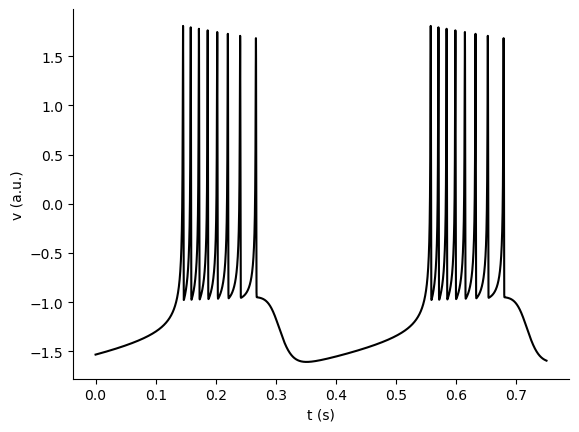

In [4]:
#Visualization
plt.figure()
plt.plot((data['t'] / 1000) - min(data['t'] / 1000), 
         data['x'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (a.u.)')
plt.show()

## Hindmarsh-Rose Model Compared to Biological Burster

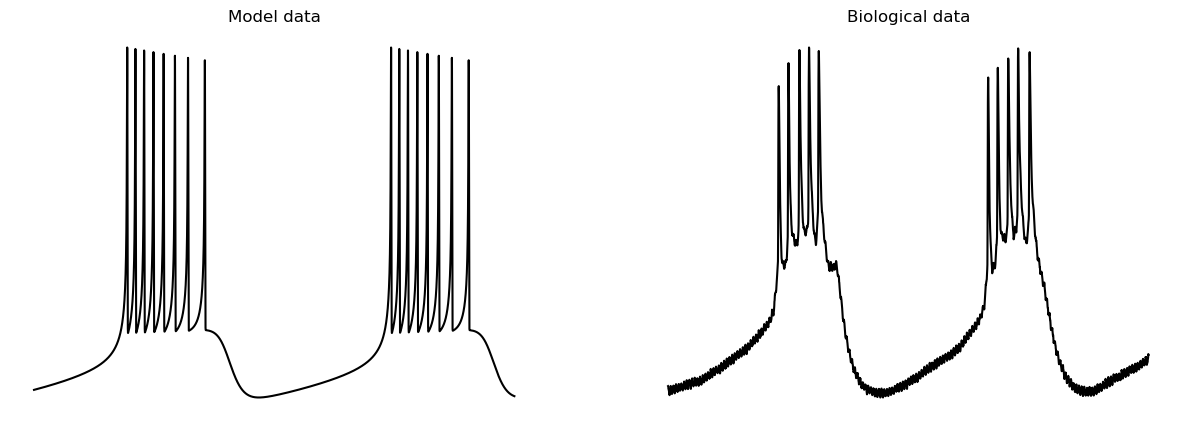

In [5]:
#Data dump
biolData = pd.read_csv('..\\data\\biologicalBurster.csv')

##Visualization
#Creation of graphics device
plt.figure(figsize = (15, 5))

#Creation of first panel (model data)
plt.subplot(121)
plt.plot(data['t'], 
         data['x'],
         color = 'black')
plt.title('Model data')
plt.axis('off')

#Creation of second panel (biological data)
plt.subplot(122)
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black')
plt.title('Biological data')
plt.axis('off')

#Render visualization to jupyter
plt.show()

## Hindmarsh-Rose Model With Noise Compared to Biological Burster

### Voltage-representing, state-variable equation with additive noise

$$\frac{dx}{dt} = y - ax^{3} + bx^{2} - z + w\xi + i$$

In [6]:
###Main block
#Modl params
a, b, c, d = 1, 3, 1, 5
r, s, x0, i_ = 0.001, 4, -1.6, 2
w = 1

#Run controls
time, dt = 2000, 0.01
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([0.5, 0.5, 0.5])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = y - a * x ** 3 + b * x ** 2 - z + (w * gauss(mu = 0, sigma = 1)) + i_
    dydt = c - d * x ** 2 - y
    dzdt = r * (s * (x - x0) - z)

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using forward-Euler formalism
for i,_ in enumerate(t):
    sVars[i + 1] = sVars[i] + dt * dfdt(sVars[i])
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0),
                     'x': sVars[:, 0]}) \
         .query('t >= 1000 & t <= 1750') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,1000.00,-1.339023
1,1000.01,-1.320845
2,1000.02,-1.332076
3,1000.03,-1.321487
4,1000.04,-1.315268


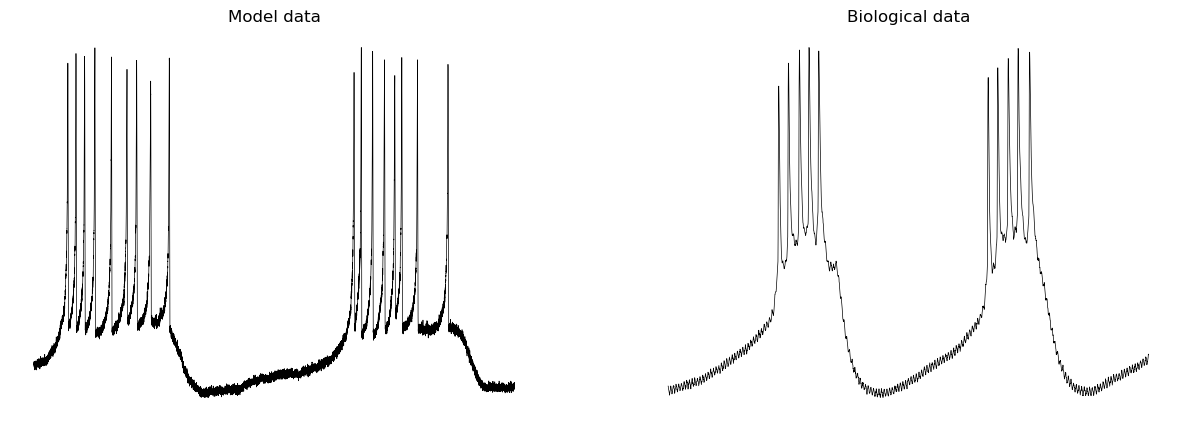

In [7]:
##Visualization
#Creation of graphics device
plt.figure(figsize = (15, 5))

#Creation of first panel (model data)
plt.subplot(121)
plt.plot(data['t'], 
         data['x'],
         linewidth = 0.5,
         color = 'black')
plt.title('Model data')
plt.axis('off')

#Creation of second panel (biological data)
plt.subplot(122)
plt.plot(biolData['t'], 
         biolData['v'],
         linewidth = 0.5,
         color = 'black')
plt.title('Biological data')
plt.axis('off')

#Draw visualization to jupyter
plt.show()

## Hindmarsh-Rose Model Parameterized to Produce Chaotic Activity

### Recapitulated system of differential equations

$$\frac{dx}{dt} = ay + bx^{2} - cx^{3}  - dz + ei$$

$$\frac{dy}{dt} = f - gx^{2} - y$$

$$\frac{dz}{dt} = (-z + hx + j) * k$$

In [8]:
###Main block
#Modl params
a, b, c, d, e = 4, 1.5, 0.25, 2, 2
f, g, h, j, k = 0.5, 0.625, 2, 6.4, 0.0021
i_ = 3.281

#Run controls
time, dt = 2500, 0.0025
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([1, 1, 1])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = a * y + b * x ** 2 - c * x ** 3 - d * z + e * i_
    dydt = f - g * x ** 2 - y
    dzdt = (-z + h * x + j) * k

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using rk45 formalism
for i,_ in enumerate(t):
    k1 = dfdt(sVars[i])
    k2 = dfdt(sVars[i] + (dt / 2) * k1)
    k3 = dfdt(sVars[i] + (dt / 2) * k2)
    k4 = dfdt(sVars[i] + dt * k3)
    sVars[i + 1] = sVars[i] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0),
                     'x': sVars[:, 0]}) \
         .query('t >= 500 & t <= 2000') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,500.0000,-1.977806
1,500.0025,-1.977825
2,500.0050,-1.977844
3,500.0075,-1.977863
4,500.0100,-1.977882


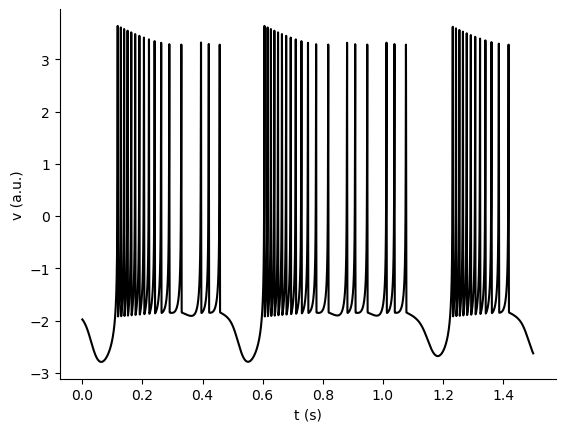

In [9]:
#Visualization
plt.figure()
plt.plot((data['t'] / 1000) - min(data['t'] / 1000), 
         data['x'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (a.u.)')
plt.show()

## Development of feature-extraction algorithm

### 1. Ingest biological data from which features will be extracted

In [10]:
#Ingest data using pandas
biolData = pd.read_csv('..\\data\\ergodicData.csv')

#I.O
biolData.head()

,t,v
0,0.000,-66.501
1,0.001,-66.367
2,0.002,-66.373
3,0.003,-66.415
4,0.004,-66.496


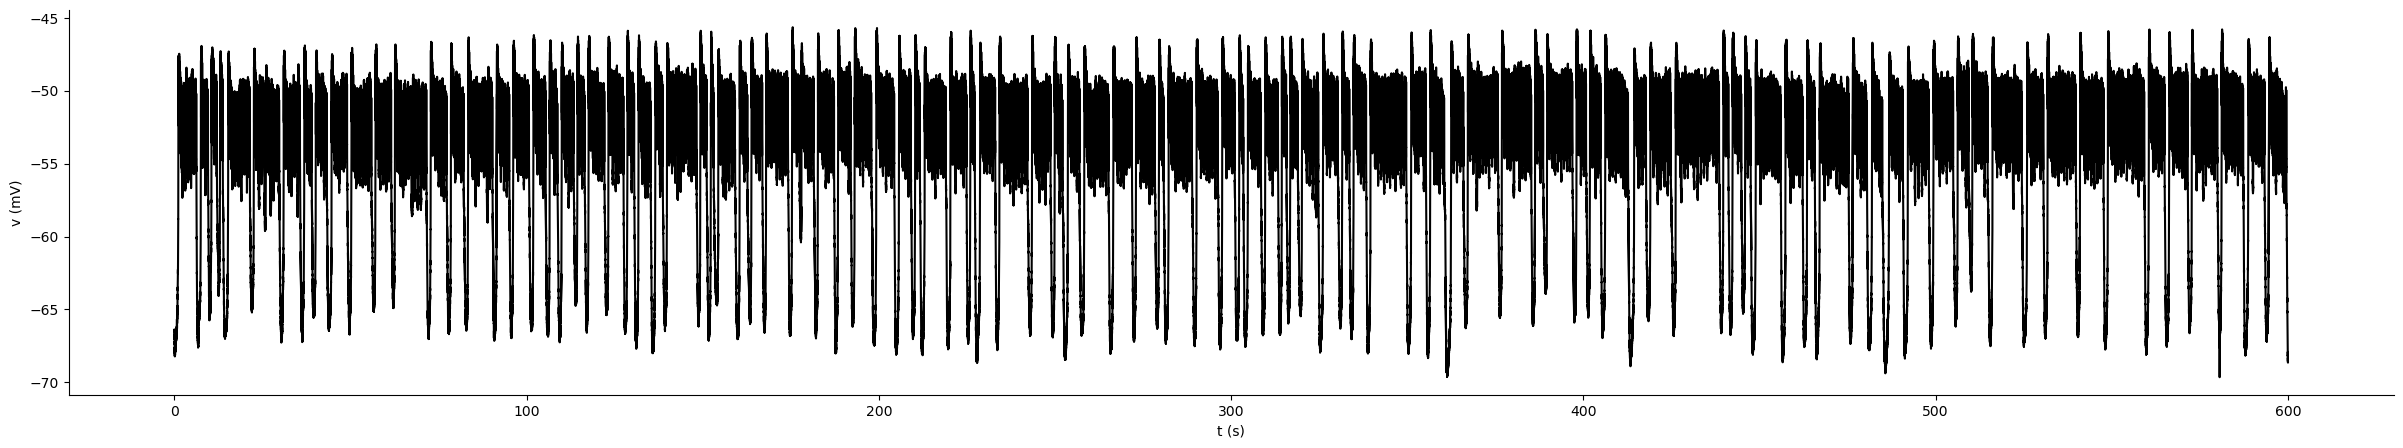

In [11]:
#Visualization
plt.figure(figsize = (30, 5))
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')
plt.show()

### 2. Find local maxima of voltage data, detect spikes

In [12]:
##Spike detection via threshold crossings
#Approximate local maximum (i.e., peaks)
peaks,_ = find_peaks(x = biolData['v'], 
                     height = biolData['v'].describe()['mean'] + \
                              biolData['v'].describe()['std'] / 2, 
                     distance = 50)

#Spike detection
spikes = biolData.loc[biolData \
                 .index \
                 .isin(peaks),] \
                 .reset_index(drop = True)

#I.O
spikes

,t,v
0,1.172,-48.428
1,1.238,-47.574
2,1.309,-47.766
3,1.389,-47.467
4,1.483,-48.376
...,...,...
5888,599.107,-50.616
5889,599.221,-50.339
5890,599.335,-50.500
5891,599.426,-49.759


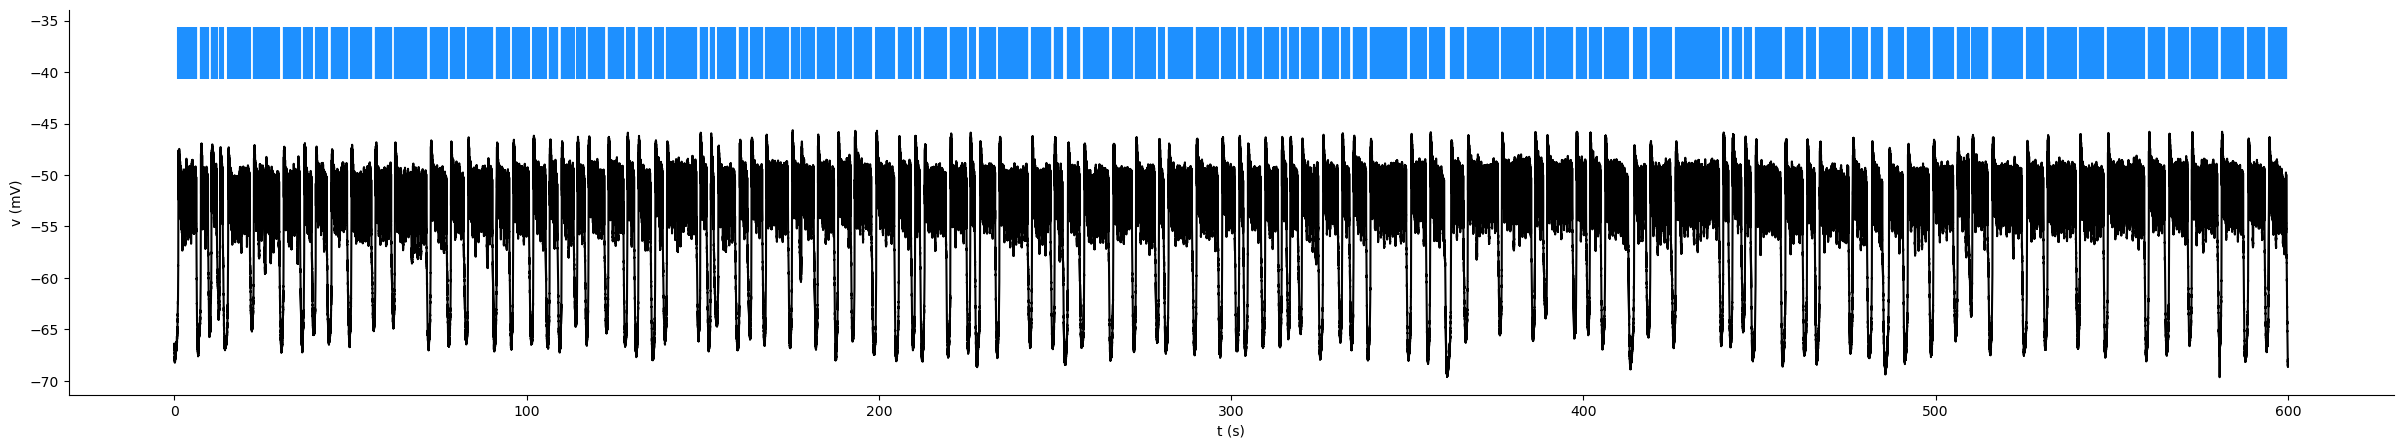

In [13]:
##Visualization
#Creation of graphics device
plt.figure(figsize = (30, 5))

#Plot biologica/model data
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black',
         label = 'Biological Data')

#Plot binary spike train
plt.vlines(spikes['t'], 
           biolData['v'].max() + 5, 
           biolData['v'].max() + 10, 
           color = 'dodgerblue',
           label = 'Spikes')

#Alter plot attributes
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')

#Draw visualization to jupyter
plt.show()

### 3. Compute features: ISI, IBI, spike frequency, Lyaponov exponent

In [14]:
##Simple differentiation of binary spike train across time
#Compute difference between spikes
dataDiff = np.diff(spikes['t'])

#Convert to pandas vector
dataDiff = pd.Series(dataDiff)
dataDiff

0       0.066
1       0.071
2       0.080
3       0.094
4       0.056
        ...  
5887    0.233
5888    0.114
5889    0.114
5890    0.091
5891    0.098
Length: 5892, dtype: float64

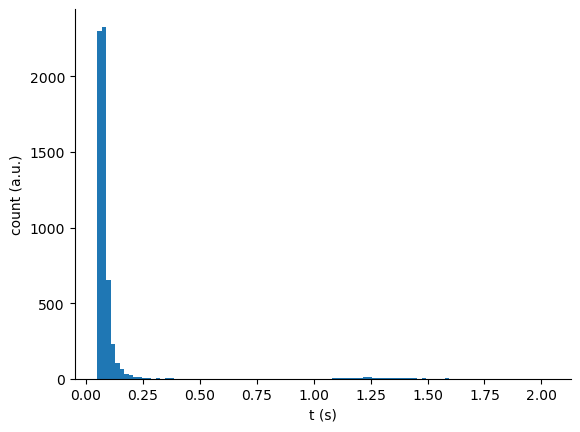

In [15]:
#Visualization
plt.figure()
plt.hist(dataDiff,
         bins = 100)
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('count (a.u.)')
plt.show()

In [16]:
##Subset ISI
#Conditionally subset with 5*sigma rule
dataISI = dataDiff.loc[(dataDiff < (dataDiff.std() * 5))] \
                  .reset_index(drop = True)

##Subset IBI
dataIBI = dataDiff.loc[(dataDiff > (dataDiff.std() * 5))] \
                  .reset_index(drop = True)

In [17]:
#Extract x, y data from hist
yISI, xISI, _ = plt.hist(dataISI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for ISI
#I.O
ISI = xISI[yISI.argmax()]
ISI

0.06754999999995648

In [18]:
#Extract x, y data from hist
yIBI, xIBI, _ = plt.hist(dataIBI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for IBI
#I.O
IBI = xIBI[yIBI.argmax()]
IBI

1.2034999999999938

In [19]:
##Determination of spike frequency per epoch
#Calculate spike frequency
spikeFreq = spikes['t'].count() / spikes['t'].max()

#I.O
spikeFreq

9.829464708668878

In [21]:
###Capture N number of epochs
##600 s / 30 s = 20 epochs
#Param instantiations for epoch identifications
initialTime = 0
timeWindow = 30
epochs = (max(biolData['t']) - 1) / timeWindow

#Instantiate DAQ list-column
epochs_ = []

#Initialize iterator
i = 0

#Capture time-series epochs for ergodic computation of ;yap expo
while i <= epochs:
    #Append epoch to DAQ list-column
    epochs_.append(biolData.query(f't > {initialTime} & t <= {timeWindow}') \
                           .reset_index(drop = True))

    #Update params
    initialTime = timeWindow
    timeWindow += 30

    #Increase iterator
    i += 1

#DAQ list
dataLyap = []

#Determination of lyap expo
for i,_ in enumerate(epochs_):
    #Compute largest Lyap expo per epoch
    dataLyap.append(nolds.lyap_r(epochs_[i]['v']))

#I.O
lyapExpo = sum(dataLyap) / len(dataLyap)
lyapExpo

0.006650452467153333

In [25]:
#Capture optimization targets in intuitive data structure
optoData = pd.DataFrame({'ISI (s)': [ISI],
                         'IBI (s)': [IBI],
                         'Spike Frequency (spikes/s)': [spikeFreq],
                         'Lyaponov Exponent (a.u.)': [lyapExpo]})

#Alter df attributes
optoData = optoData.style \
                   .set_table_styles([dict(selector = 'th', 
                                           props = [('text-align', 'center')])]) \
                   .set_properties(**{'text-align': 'center'}) \
                   .hide_index()

#I.O
optoData

ISI (s),IBI (s),Spike Frequency (spikes/s),Lyaponov Exponent (a.u.)
0.067550,1.203500,9.829465,0.006650


### Functionalize feature-extraction algorithm for model data